# Проект: Машинное обучение в бизнесе

### Описание проекта


Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 
Шаги для выбора локации обычно такие:
В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
Строят модель для предсказания объёма запасов в новых скважинах;
Выбирают скважины с самыми высокими оценками значений;
Определяют регион с максимальной суммарной прибылью отобранных скважин.
Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

## Шаг 1. Загрузка и изучение данных

### Ипорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [2]:
gd0=pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv',sep=',')
gd1=pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv',sep=',')
gd2=pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv',sep=',')

In [3]:
def dataset_info(dataset,name):
    display(f'Анализ датафрейма {name}')
    display(dataset.head(5))
    display(f'Количество пустых ячеек:')
    display(dataset.isnull().sum())
    display(dataset.info())
    display(f'Количество явных дубликатов в датасете:{dataset.duplicated().sum()}' )

In [4]:
dataset_info(gd0, 'gd0')
dataset_info(gd1, 'gd1')
dataset_info(gd2, 'gd2')

'Анализ датафрейма gd0'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


'Количество пустых ячеек:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Количество явных дубликатов в датасете:0'

'Анализ датафрейма gd1'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


'Количество пустых ячеек:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Количество явных дубликатов в датасете:0'

'Анализ датафрейма gd2'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


'Количество пустых ячеек:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Количество явных дубликатов в датасете:0'

### Вывод:
по результатам загрузки трех датафреймов можно сделать вывод, что форматы ячеек не стоит изменять, явные дубликаты отсутствуют.

In [5]:
gd0['id']=gd0['id'].str.lower()
gd1['id']=gd1['id'].str.lower()
gd2['id']=gd2['id'].str.lower()

display(f'Количество явных дубликатов в датасете gd0: {gd0.duplicated().sum()}' )
display(f'Количество явных дубликатов в датасете gd1: {gd1.duplicated().sum()}' )
display(f'Количество явных дубликатов в датасете gd2: {gd2.duplicated().sum()}' )

'Количество явных дубликатов в датасете gd0: 0'

'Количество явных дубликатов в датасете gd1: 0'

'Количество явных дубликатов в датасете gd2: 0'

### Вывод:
после приведения значений столбца ID к нижнему регистру явные дубликаты не выявлены

## Шаг 2. Исследовательский анализ данных

In [6]:
def graphs(dataset,name):
    display(f'Анализ количественных признаков датафрейма {name}')
    display(dataset.describe())
    for j in dataset.columns:
        if (dataset[j].dtype!= object) and j!="id":
            fig = plt.hist(dataset[j],color = 'blue', edgecolor = 'black',bins = 50)
            plt.xlabel(j)
            plt.ylabel('Количество')
            plt.title(f'Анализ столбца {j}',fontweight = "bold")
            plt.show()
            dataset.boxplot([j])
            plt.title(f'Boxplot для  столбца {j}')
            plt.show()

'Анализ количественных признаков датафрейма gd0'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


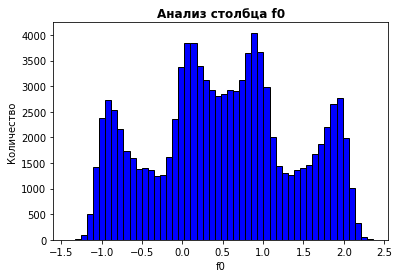

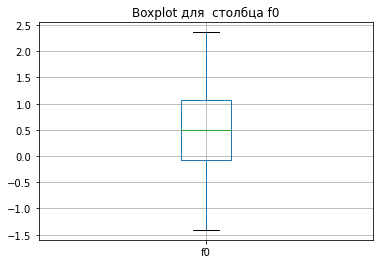

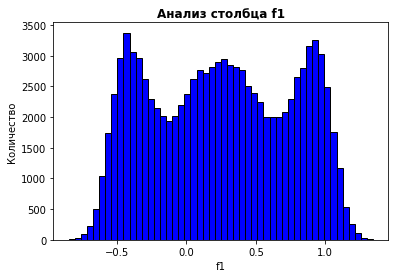

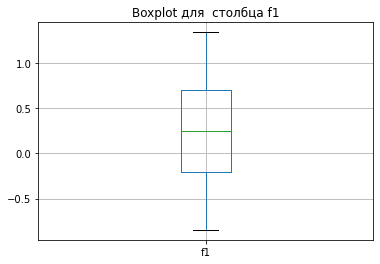

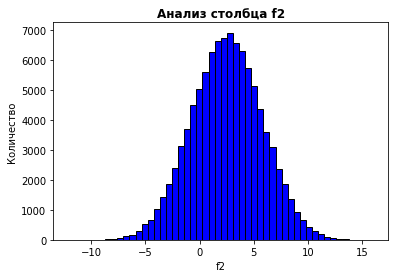

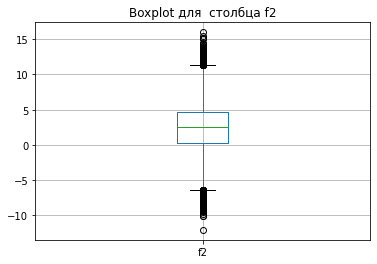

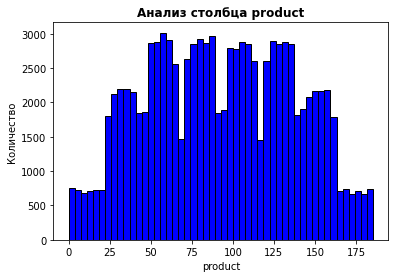

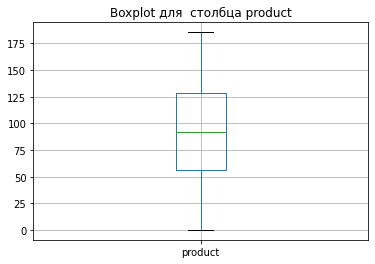

In [7]:
graphs(gd0, 'gd0')

'Анализ количественных признаков датафрейма gd1'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


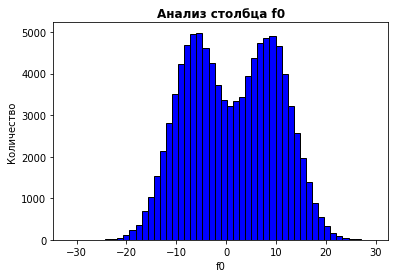

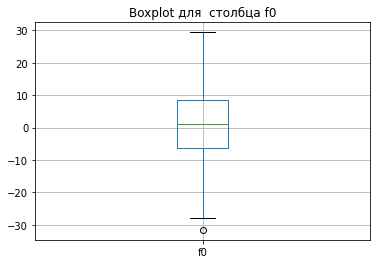

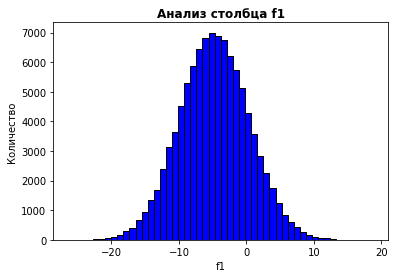

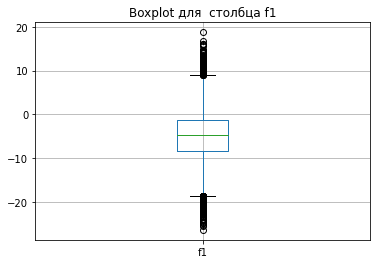

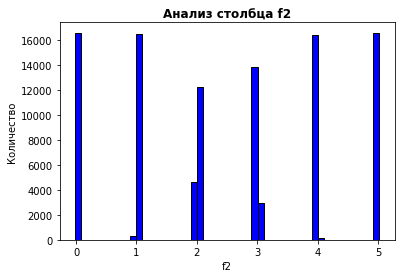

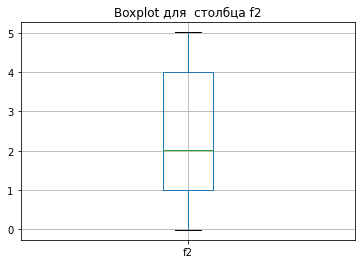

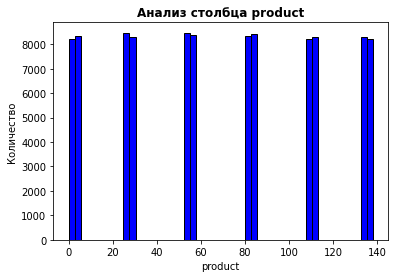

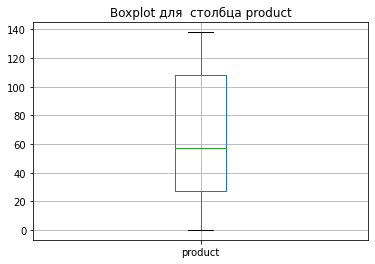

In [8]:
graphs(gd1, 'gd1')

'Анализ количественных признаков датафрейма gd2'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


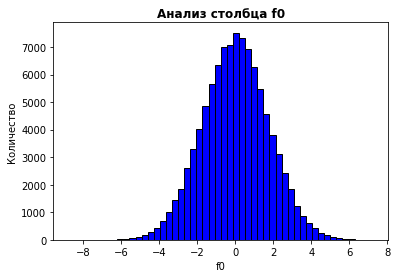

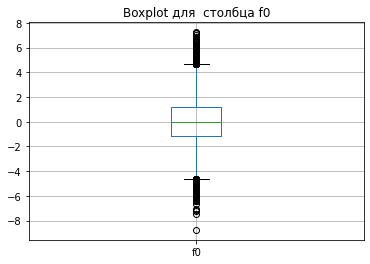

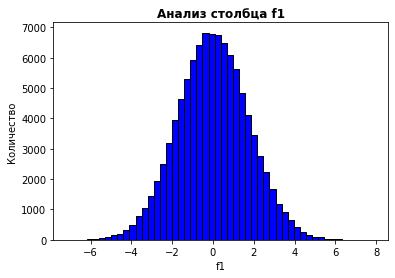

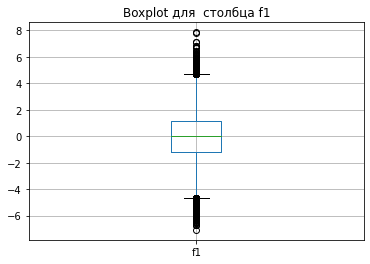

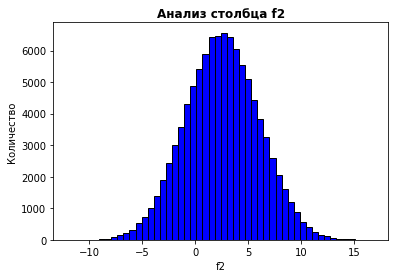

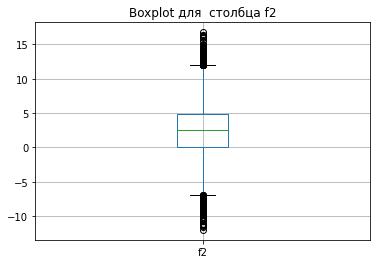

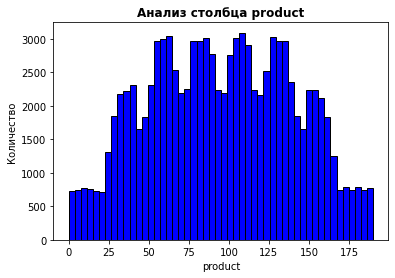

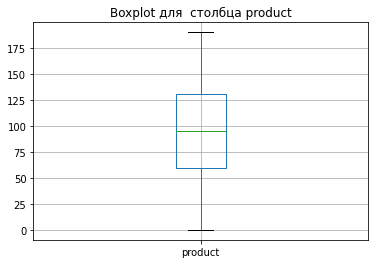

In [9]:
graphs(gd2, 'gd2')

### Вывод:
По результатам исследовательского анализа можно сделать вывод, что выбросы отсуствуют. В трех датафреймах все данные оставим без изменений

## Шаг 3. Обучение и проверка модели для каждого региона

In [10]:
def linear_regression(data,name):
    data=data.drop('id', axis=1)
    RANDOM_STATE = 42
    X = data.drop('product', axis=1)
    y = data['product']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=RANDOM_STATE)    

    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    rmse  = np.sqrt(mean_squared_error(y_test, predictions))
    display(f'Обучение и проверка модели для региона {name}')
    display(f'Cредний запас сырья= {y_test.mean():.2f} тыс. баррелей')
    display(f'Cредний запас предсказанного сырья= {predictions.mean():.2f} тыс. баррелей')
    display(f'RMSE = {rmse:.2f}')
    data_final=X_test
    data_final['product_predictions']=predictions
    data_final= data_final.merge(y, how='left', left_index=True, right_index=True).sort_values(by='product_predictions',ascending=False)
    return data_final

In [11]:
gd0_pred=linear_regression(gd0,'gd0')
gd1_pred=linear_regression(gd1,'gd1')
gd2_pred=linear_regression(gd2,'gd2')

'Обучение и проверка модели для региона gd0'

'Cредний запас сырья= 92.33 тыс. баррелей'

'Cредний запас предсказанного сырья= 92.40 тыс. баррелей'

'RMSE = 37.76'

/tmp/ipykernel_48/1139629469.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['product_predictions']=predictions


'Обучение и проверка модели для региона gd1'

'Cредний запас сырья= 68.73 тыс. баррелей'

'Cредний запас предсказанного сырья= 68.71 тыс. баррелей'

'RMSE = 0.89'

/tmp/ipykernel_48/1139629469.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['product_predictions']=predictions


'Обучение и проверка модели для региона gd2'

'Cредний запас сырья= 95.15 тыс. баррелей'

'Cредний запас предсказанного сырья= 94.77 тыс. баррелей'

'RMSE = 40.15'

/tmp/ipykernel_48/1139629469.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['product_predictions']=predictions


### Вывод
по результатам обучения модели на данных из трех регионов, можно сделать вывод о том, что для региона 1 RMSE составил 0,89, но ошибка для двух других составляет 37,76 (регион 0) и 40,15 (регион 2) соответсвенно. Высокие показатели ошибки могут свидетельствовать о некорректности предсказаний модели

## Шаг 4. Расчет прибыли

In [12]:
PRICE=450*pow(10,3)
N_SKV=500
N_BEST_SKV=200
BUDGET=10*pow(10,9)


In [13]:
oil_volume=BUDGET/(PRICE*N_BEST_SKV)
display(f'Достаточный объём сырья для безубыточной разработки новой скважины: {oil_volume:.2f} тыс.баррелей')

display(f'Средний запас в регионе 0: {gd0["product"].mean():.2f} тыс. баррелей')
display(f'Процент скажин в регионе 0 с объемом сырья ниже достаточного: {gd0["product"].apply(lambda x: x < oil_volume).sum() / len(gd0)*100} %')

display(f'Средний запас в регионе 1: {gd1["product"].mean():.2f} тыс. баррелей')
display(f'Процент скажин в регионе 0 с объемом сырья ниже достаточного: {gd1["product"].apply(lambda x: x < oil_volume).sum() / len(gd1)*100} %')

display(f'Средний запас в регионе 2: {gd2["product"].mean():.2f} тыс. баррелей')
display(f'Процент скажин в регионе 0 с объемом сырья ниже достаточного: {gd2["product"].apply(lambda x: x < oil_volume).sum() / len(gd2)*100} %')


'Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс.баррелей'

'Средний запас в регионе 0: 92.50 тыс. баррелей'

'Процент скажин в регионе 0 с объемом сырья ниже достаточного: 63.417 %'

'Средний запас в регионе 1: 68.83 тыс. баррелей'

'Процент скажин в регионе 0 с объемом сырья ниже достаточного: 83.463 %'

'Средний запас в регионе 2: 95.00 тыс. баррелей'

'Процент скажин в регионе 0 с объемом сырья ниже достаточного: 61.822 %'

### Вывод
Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс.баррелей
Процент скажин в регионе 0 с объемом сырья ниже достаточного: 63.417 %
Процент скажин в регионе 0 с объемом сырья ниже достаточного: 83.463 %
Процент скажин в регионе 0 с объемом сырья ниже достаточного: 61.822 %
Более 60 % скважин во всех регионах убыточные

In [14]:
def profit(target, predicted,n_sk):
    pred_ind = predicted.sort_values(ascending=False).index
    return (target[pred_ind][:n_sk].sum() * PRICE - BUDGET)/pow(10,9)

In [15]:
display(f'Объём сырья в регионе 0: {gd0_pred["product_predictions"].head(200).sum()/pow(10,3):.2f} млн. баррелей')
display(f'Валовая прибыль в регионе 0: {profit(gd0_pred["product"],gd0_pred["product_predictions"],N_BEST_SKV):.2f} млрд. рублей')

display(f'Объём сырья в регионе 1: {gd1_pred["product_predictions"].head(200).sum()/pow(10,3):.2f} млн. баррелей')
display(f'Валовая прибыль в регионе 1: {profit(gd1_pred["product"],gd1_pred["product_predictions"],N_BEST_SKV):.2f} млрд. рублей')

display(f'Объём сырья в регионе 2: {gd2_pred["product_predictions"].head(200).sum()/pow(10,3):.2f} млн. баррелей')
display(f'Валовая прибыль в регионе 2: {profit(gd2_pred["product"],gd2_pred["product_predictions"],N_BEST_SKV):.2f} млрд. рублей')

'Объём сырья в регионе 0: 30.88 млн. баррелей'

'Валовая прибыль в регионе 0: 3.36 млрд. рублей'

'Объём сырья в регионе 1: 27.75 млн. баррелей'

'Валовая прибыль в регионе 1: 2.42 млрд. рублей'

'Объём сырья в регионе 2: 29.73 млн. баррелей'

'Валовая прибыль в регионе 2: 2.60 млрд. рублей'

### Вывод
Наибольший объем предсказанного сырья в регионе 0: 30.88 млн. баррелей

## Шаг 5. Расчет рисков и прибыли для каждого региона

In [16]:
def bootstrap(data,region):
    state = np.random.RandomState(890)
    probabilities=data['product_predictions']
    target=data['product']
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=N_SKV,replace=True,random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample,N_BEST_SKV))
        
    values = pd.Series(values)
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975)
    mean = values.mean()
    risk =  values.apply(lambda x: x < 0).sum() / len(values)*100
    
    values.hist(figsize=(16, 5), bins=50)
    plt.axvline(values.quantile(0.025))
    plt.axvline(values.quantile(0.975))
    plt.xlabel('Прибыль, руб.')
    plt.ylabel('Количество скважин')
    plt.title(f'Распределение прибыли для региона {region}')
    plt.show()
    
    display(f'Средняя прибыль {mean:.2f} млрд.рублей')
    display(f'Нижняя граница 95 % доверительного интервала {lower:.2f} млрд.рублей')
    display(f'Верхняя граница 95 % доверительного интервала {upper:.2f} млрд.рублей')
    display(f'Риск убытков {risk:.2f} %')


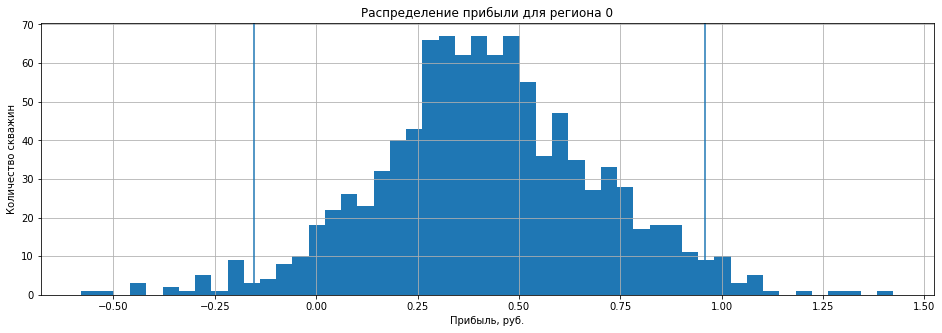

'Средняя прибыль 0.42 млрд.рублей'

'Нижняя граница 95 % доверительного интервала -0.15 млрд.рублей'

'Верхняя граница 95 % доверительного интервала 0.96 млрд.рублей'

'Риск убытков 5.30 %'

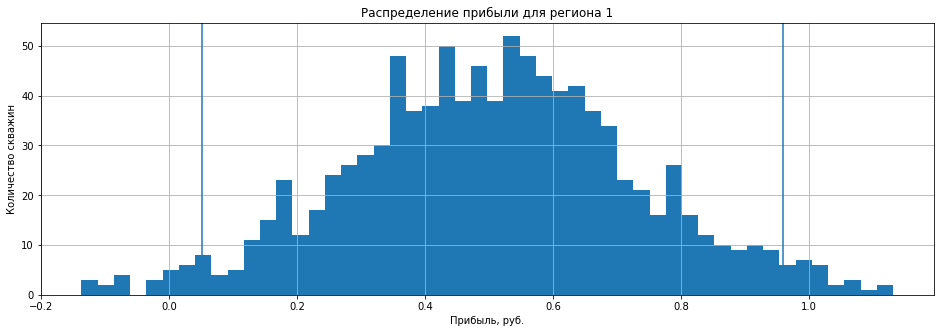

'Средняя прибыль 0.51 млрд.рублей'

'Нижняя граница 95 % доверительного интервала 0.05 млрд.рублей'

'Верхняя граница 95 % доверительного интервала 0.96 млрд.рублей'

'Риск убытков 1.40 %'

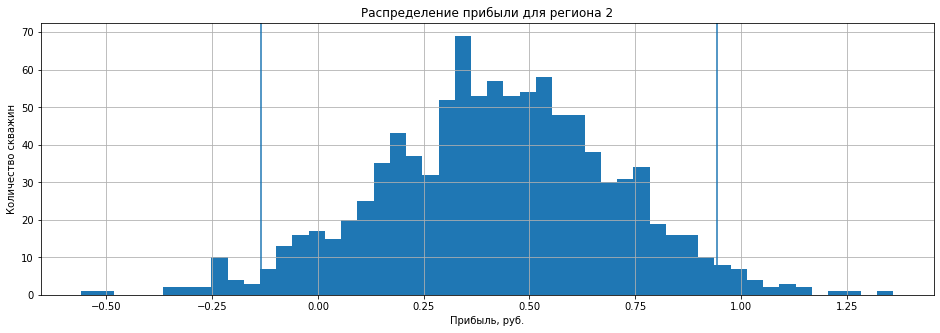

'Средняя прибыль 0.42 млрд.рублей'

'Нижняя граница 95 % доверительного интервала -0.14 млрд.рублей'

'Верхняя граница 95 % доверительного интервала 0.94 млрд.рублей'

'Риск убытков 7.30 %'

In [17]:
bootstrap(gd0_pred,'0')
bootstrap(gd1_pred,'1')
bootstrap(gd2_pred,'2') 

### Вывод
Средняя прибыль для 200 скважин 0.42 млрд.рублей, 0.51 млрд.рублей,0.42 млрд.рублей для регионов 0,1,2 соответсвенно. Стоит рекомендовать регион 1 для разработки (также риск убытков 1,4%, что менее требуемых 2,5%)

# Общие выводы:

По результатам загрузки трех датафреймов можно сделать вывод, что форматы ячеек не стоит изменять, явные дубликаты отсутствуют.

После приведения значений столбца ID к нижнему регистру явные дубликаты не выявлены

По результатам исследовательского анализа можно сделать вывод, что выбросы отсуствуют. В трех датафреймах все данные оставим без изменений

По результатам обучения модели на данных из трех регионов, можно сделать вывод о том, что для региона 1 RMSE составил 0,89, но ошибка для двух других составляет 37,76 (регион 0) и 40,15 (регион 2) соответсвенно. Высокие показатели ошибки могут свидетельствовать о некорректности предсказаний модели

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11 тыс.баррелей
Процент скажин в регионе 0 с объемом сырья ниже достаточного: 63.417 %
Процент скажин в регионе 0 с объемом сырья ниже достаточного: 83.463 %
Процент скажин в регионе 0 с объемом сырья ниже достаточного: 61.822 %
Более 60 % скважин во всех регионах убыточные

Наибольший объем предсказанного сырья в регионе 0: 30.88 млн. баррелей

Средняя прибыль для 200 скважин 0.42 млрд.рублей, 0.51 млрд.рублей,0.42 млрд.рублей для регионов 0,1,2 соответсвенно. Стоит рекомендовать регион 1 для разработки (также риск убытков 1,4%, что менее требуемых 2,5%)